<a href="https://colab.research.google.com/github/treyra/CS155_miniproject2/blob/master/Movie_Data_Cleanup_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import seaborn as ss
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
# Import Data
movies = np.genfromtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt',delimiter='\t',dtype=None,encoding='ISO-8859-1')
df_movies =np.array([list(datum) for datum in movies])
#df_movies
data=np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt').astype(int)
train=np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/train.txt').astype(int)
test=np.loadtxt('https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/test.txt').astype(int)

In [28]:
len(df_movies)

1682

In [29]:
# Cleaning up movie dataset
# Removing quotation marks
for i in range(len(df_movies)):
    if df_movies[i][1][0]=='"':
        df_movies[i][1]=df_movies[i][1][1:]
    if df_movies[i][1][-1]=='"':
        df_movies[i][1]=df_movies[i][1][:-1]
# Find unique movie names
unique_movies =np.unique(df_movies[:,1])
# 
unique_movie_ids=np.zeros(len(unique_movies))
ids_to_del=()
for i,name in enumerate(unique_movies):
    # find the id matching a movie name, the first one to show up
    unique_movie_ids[i]=df_movies[np.nonzero(df_movies[:,1]==name)[0][0],0]
    # if a movies has more than 1 ids, save in ids_to_del
    ids=df_movies[np.nonzero(df_movies[:,1]==name)[0],0]
    if len(ids)>1:
        ids_to_del+=(ids,)
# sort for unique ids
unique_movie_ids=np.array(sorted(unique_movie_ids))
movie_idxs=(unique_movie_ids-1).astype(int)
# remove duplicates
movies_clean=df_movies[movie_idxs,:]
# change movie indices from duplicates (ids_to_del) to the original in the other dataframes
for ids in ids_to_del:
    data[data[:,1]==int(ids[1]),1]=int(ids[0])
    test[test[:,1]==int(ids[1]),1]=int(ids[0])
    train[train[:,1]==int(ids[1]),1]=int(ids[0])

    
data_clean=np.unique(data,axis=0) 
test_clean=np.unique(test,axis=0) 
train_clean=np.unique(train,axis=0)

In [30]:
len(movies_clean)

1664

In [31]:
# import pandas as pd
# movies_clean=pd.DataFrame(movies_clean)
# data_clean=pd.DataFrame(data_clean)
# test_clean=pd.DataFrame(test_clean)
# train_clean=pd.DataFrame(movies_clean)

In [32]:
# # save the files
# # put it together in a dataframe and save
# from google.colab import  drive

# def save_csv(df, savestr):
#   drive.mount("/drive", force_remount=True)
#   df.to_csv('/drive/My Drive/CS155_miniproject_2/'+str(savestr)+'.csv')
# save_csv(movies_clean,'movies_clean')
# save_csv(data_clean,'data_clean')
# save_csv(test_clean,'test_clean')
# save_csv(train_clean,'train_clean')

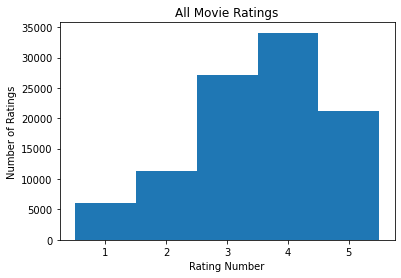

In [33]:
# How many review do we have of each type
revs=data_clean[:,2]
Bins=np.arange(.5,6,1)
plt.figure(1)
plt.hist(revs,bins=Bins)
plt.xlabel('Rating Number')
plt.ylabel('Number of Ratings');
plt.title('All Movie Ratings');
plt.show()

In [34]:
# Find the avg movie rating and number of ratings for each movie
avg_rating=np.zeros((len(movies_clean),2))
pop_score=np.zeros((len(movies_clean),2))
# set the first column to id
avg_rating[:,0]=movies_clean[:,0]
pop_score[:,0]=movies_clean[:,0]
# Now calc avg and number of ratings
#For each id, find the avg ratings and the number of ratings
for i,id in enumerate(movies_clean[:,0].astype(int)):
    avg_rating[i,1]=(data_clean[data_clean[:,1]==id,2]).mean()
    pop_score[i,1]=(data_clean[data_clean[:,1]==id,2]).shape[0]
# Now take out the 10 most popular ones
popular_ids=np.array([pop_score[(-pop_score[:,1]).argsort()[:10],0]])
print(popular_ids)
# Now the 10 highest scoring ones
highest_avg_ids=np.array([avg_rating[(-avg_rating[:,1]).argsort()[:10],0]])
print(highest_avg_ids)

[[ 50. 258. 100. 181. 294. 286. 288.   1. 300. 121.]]
[[1500. 1536. 1293. 1201.  814. 1189. 1122. 1599. 1467. 1653.]]


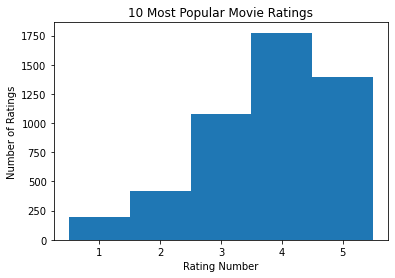

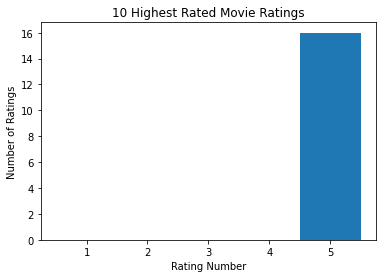

In [35]:
# plot
popular_ratings=data_clean[(data_clean[:,[1]]==popular_ids).any(1),2]
avg_ratings=data_clean[(data_clean[:,[1]]==highest_avg_ids).any(1),2]
plt.figure()
Bins=np.arange(.5,6,1)
plt.hist(popular_ratings,bins=Bins);
plt.xlabel('Rating Number')
plt.ylabel('Number of Ratings');
plt.title('10 Most Popular Movie Ratings');
plt.show()
plt.figure()
plt.hist(avg_ratings,bins=Bins);
plt.xlabel('Rating Number')
plt.ylabel('Number of Ratings');
plt.title('10 Highest Rated Movie Ratings');
plt.show()

In [36]:
# Most popular
for row in movies_clean:
  if int(row[0]) in popular_ids:
    print(row[1])

Toy Story (1995)
Star Wars (1977)
Fargo (1996)
Independence Day (ID4) (1996)
Return of the Jedi (1983)
Contact (1997)
English Patient, The (1996)
Scream (1996)
Liar Liar (1997)
Air Force One (1997)


In [37]:
# higest rated
for row in movies_clean:
  if int(row[0]) in highest_avg_ids:
    print(row[1])

Great Day in Harlem, A (1994)
They Made Me a Criminal (1939)
Prefontaine (1997)
Marlene Dietrich: Shadow and Light (1996) 
Star Kid (1997)
Saint of Fort Washington, The (1993)
Santa with Muscles (1996)
Aiqing wansui (1994)
Someone Else's America (1995)
Entertaining Angels: The Dorothy Day Story (1996)


[5, 8, 9]


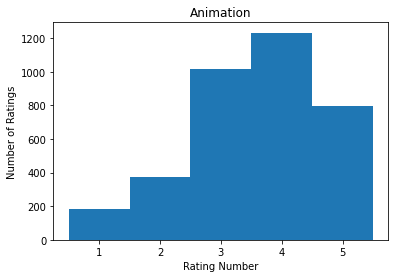

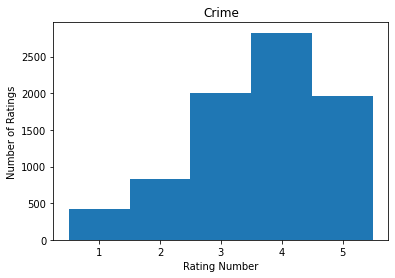

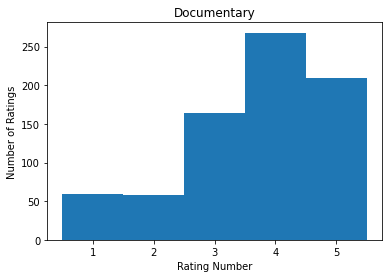

In [38]:
# get all genres
title_row = np.array(['Movie Id','Movie Title','Unknown', 'Action', 'Adventure', 'Animation', 'Children’s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
# pick 3 genres
picked_genres = ['Animation','Crime', 'Documentary'] # sorted alphabetically
# get all movies from genres
genre_idx = []
for i,element in enumerate(title_row):
  if element in picked_genres:
    genre_idx.append(i)
print(genre_idx)
# plot ratings
for i,idx in enumerate(genre_idx):
  # find movies in the genre
  ids_in_genre=movies_clean[movies_clean[:,idx]=='1',0].astype(int)
  # get ratings
  ratings =data_clean[(data_clean[:,[1]]==ids_in_genre).any(1),2]
  # plot
  plt.hist(ratings,bins=Bins)
  plt.title(picked_genres[i])
  plt.xlabel('Rating Number')
  plt.ylabel('Number of Ratings');
  plt.show()